# Rydberg Blockade Radius

In this notebook we probe the values of the interatomic distance for which we obtain a strong Rydberg Blockade effect.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import qutip

In [16]:
from pulser import Pulse, Sequence, Register
from pulser.devices import Chadoq2
from pulser.simulation import Simulation
from pulser.waveforms import BlackmanWaveform,ConstantWaveform

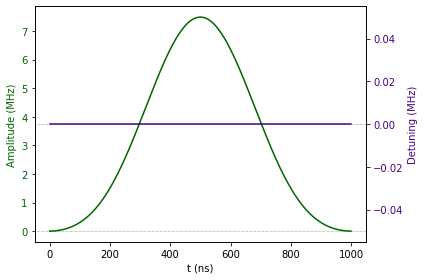

In [17]:
duration = 1000 # Natural: ~1 µsec
pi_pulse = Pulse(BlackmanWaveform(duration,np.pi),ConstantWaveform(duration,0),0)
pi_pulse.draw()

In [22]:
Omega_max = np.max(pi_pulse.amplitude.samples)
R_blockade = (5.008e6/Omega_max)**(1/6)
print(R_blockade)

9.351655459183137


In [23]:
res = []
divisions = 5
distances = np.linspace(6.5,11.5,divisions)

In [24]:
for i,R in enumerate(distances):
    print(f'{divisions-i} remaining...')
    # Atom Register and Device
    reg = Register.rectangle(1,2,spacing=R, prefix='atom')
    #reg.draw()

    # Pulse Sequence
    seq = Sequence(reg, Chadoq2)
    seq.declare_channel('ryd','rydberg_local','atom0')
    seq.declare_channel('ryd2','rydberg_local2','atom1')
    seq.add(pi_pulse,'ryd')
    seq.align('ryd','ryd2')
    seq.add(pi_pulse,'ryd2')
    #seq.draw()

    sim = Simulation(seq)
    plt.show()
    #print(sim._hamiltonian.to_list())
    occup = qutip.tensor([qutip.qeye(2),qutip.basis(2,0)*qutip.basis(2,0).dag()])
    sim.run(obs_list=[occup])
    res.append(sim.output.expect[0])

5 remaining...
Observables provided. Calculating expectation value...
4 remaining...
Observables provided. Calculating expectation value...
3 remaining...
Observables provided. Calculating expectation value...
2 remaining...
Observables provided. Calculating expectation value...
1 remaining...
Observables provided. Calculating expectation value...


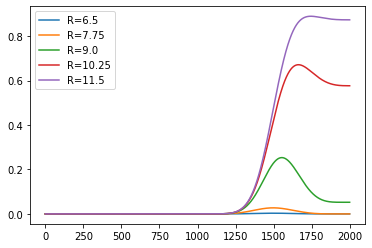

In [25]:
for i,R in enumerate(distances):
    plt.plot(res[i], label=f'R={R}')
    plt.legend()